In [18]:
import csv
import time
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import matplotlib.pyplot as plt
from collections import defaultdict

f = open('trip_data_9.csv', 'r') 
data = csv.DictReader(f)
c= 0 
for file in data:
    c+=1
    if c==10:
        break
    else:
        print(file)
        
    

{'medallion': '0CF8B9F42FED24FA1CA8AACA36D1A25B', ' hack_license': 'A04B37232EB2478C7A831A6C587C15B4', ' vendor_id': 'CMT', ' rate_code': '1', ' store_and_fwd_flag': 'N', ' pickup_datetime': '2013-09-01 16:35:05', ' dropoff_datetime': '2013-09-01 16:47:53', ' passenger_count': '2', ' trip_time_in_secs': '767', ' trip_distance': '2.60', ' pickup_longitude': '-73.9879', ' pickup_latitude': '40.724079', ' dropoff_longitude': '-73.994598', ' dropoff_latitude': '40.75058'}
{'medallion': '4D3E527682E42F1FACDFBF2D56757AC6', ' hack_license': '8C1A6E14ED1D019FBD227970CC619496', ' vendor_id': 'CMT', ' rate_code': '1', ' store_and_fwd_flag': 'N', ' pickup_datetime': '2013-09-01 17:44:05', ' dropoff_datetime': '2013-09-01 17:58:37', ' passenger_count': '1', ' trip_time_in_secs': '871', ' trip_distance': '3.50', ' pickup_longitude': '-74.007866', ' pickup_latitude': '40.710232', ' dropoff_longitude': '-74.003975', ' dropoff_latitude': '40.756569'}
{'medallion': 'D28DD94BE7682B7434EC5CA4D523A788', '

In [20]:
file.keys()

dict_keys(['medallion', ' hack_license', ' vendor_id', ' rate_code', ' store_and_fwd_flag', ' pickup_datetime', ' dropoff_datetime', ' passenger_count', ' trip_time_in_secs', ' trip_distance', ' pickup_longitude', ' pickup_latitude', ' dropoff_longitude', ' dropoff_latitude'])

    What datetime range does your data cover?  How many rows are there total?
    What are the field names?  Give descriptions for each field.
    Give some sample data for each field.
    What MySQL data types / len would you need to store each of the fields?
    int(xx), varchar(xx),date,datetime,bool, decimal(m,d)
    What is the geographic range of your data (min/max - X/Y)?
    Plot this (approximately on a map)
    What is the average overall computed trip distance? (You should use Haversine Distance)
    Draw a histogram of the trip distances binned anyway you see fit.
    What are the distinct values for each field? (If applicable)
    For other numeric types besides lat and lon, what are the min and max values?
    Create a chart which shows the average number of passengers each hour of the day. (X axis should have 24 hours)
    Create a new CSV file which has only one out of every thousand rows.
    Repeat step 9 with the reduced dataset and compare the two charts.

#1. 
f = open('trip_data_9.csv', 'r') 
data = csv.reader(f)
c= 0 
for file in data:
    c+=1
    if c==10:
        break
    else:
        print(file)
        

In [23]:
#What datetime range does your data cover?  How many rows are there total?
f = open('trip_data_9.csv', 'r') 
data = csv.DictReader(f)
c = 0 
for file in data:
    c+=1
    if c ==1:
        start_date = file[' pickup_datetime']
    else:
        end_date = file[' dropoff_datetime']
print('Total Number of rows: ',c)
print(f'Start Date:{start_date}, End Date: {end_date}')

Total Number of rows:  14107693
Start Date:2013-09-01 16:35:05, End Date: 2013-09-06 10:02:24


In [38]:
#Give some sample data for each field.
f = open('trip_data_9.csv', 'r') 
data = csv.DictReader(f)
c = 0
for i in data:
    c+=1
    if c<6:
        print(i)
    else:
        break
        


{'medallion': '0CF8B9F42FED24FA1CA8AACA36D1A25B', ' hack_license': 'A04B37232EB2478C7A831A6C587C15B4', ' vendor_id': 'CMT', ' rate_code': '1', ' store_and_fwd_flag': 'N', ' pickup_datetime': '2013-09-01 16:35:05', ' dropoff_datetime': '2013-09-01 16:47:53', ' passenger_count': '2', ' trip_time_in_secs': '767', ' trip_distance': '2.60', ' pickup_longitude': '-73.9879', ' pickup_latitude': '40.724079', ' dropoff_longitude': '-73.994598', ' dropoff_latitude': '40.75058'}
{'medallion': '4D3E527682E42F1FACDFBF2D56757AC6', ' hack_license': '8C1A6E14ED1D019FBD227970CC619496', ' vendor_id': 'CMT', ' rate_code': '1', ' store_and_fwd_flag': 'N', ' pickup_datetime': '2013-09-01 17:44:05', ' dropoff_datetime': '2013-09-01 17:58:37', ' passenger_count': '1', ' trip_time_in_secs': '871', ' trip_distance': '3.50', ' pickup_longitude': '-74.007866', ' pickup_latitude': '40.710232', ' dropoff_longitude': '-74.003975', ' dropoff_latitude': '40.756569'}
{'medallion': 'D28DD94BE7682B7434EC5CA4D523A788', '

In [42]:
pickup_lat_min = 90
pickup_lat_max = -90
pickup_long_min = 180
pickup_long_max = -180
dropoff_lat_min = 90
dropoff_lat_max = -90
dropoff_long_min = 180
dropoff_long_max = -180
n = 0
with open('trip_data_9.csv', 'r') as file:
    r = csv.DictReader(file)
    for row in r:
        if n > 0:
            try:
                pickup_lat = float(row[' pickup_latitude'])
                pickup_long = float(row[' pickup_longitude'])
                dropoff_lat = float(row[' dropoff_latitude'])
                dropoff_long = float(row[' dropoff_longitude'])
                if (-74.4 <= pickup_long <= -72.05 and 40.4 <= pickup_lat<= 41.02):
                    pickup_lat_min = min(pickup_lat_min, pickup_lat)
                    pickup_lat_max = max(pickup_lat_max, pickup_lat)
                    pickup_long_min = min(pickup_long_min, pickup_long)
                    pickup_long_max = max(pickup_long_max, pickup_long)
                if dropoff_long is not None and (-74.5 <= dropoff_long <= -72.02 and 40.75 <= dropoff_lat<= 41):
                    dropoff_lat_min = min(dropoff_lat_min, dropoff_lat)
                    dropoff_lat_max = max(dropoff_lat_max, dropoff_lat)
                    dropoff_long_min = min(dropoff_long_min, dropoff_long)
                    dropoff_long_max = max(dropoff_long_max, dropoff_long)
            except ValueError:
                continue
        n+=1
        if n > 1000000000:
            break
print("pickup_latitude_min: " ,pickup_lat_min)
print("pickup_longitude_min: ",pickup_long_min)

print("pickup_latitude_max: ",pickup_lat_max)
print("pickup_longitude_max: ",pickup_long_max)

print("dropoff_latitude_min: ",dropoff_lat_min)
print("dropoff_longitude_min: ",dropoff_long_min)

print("dropoff_latitude_max: ",dropoff_lat_max)
print("dropoff_longitude_max: ",dropoff_long_max)

pickup_latitude_min:  40.400002
pickup_longitude_min:  -74.398926
pickup_latitude_max:  41.019539
pickup_longitude_max:  -72.173218
dropoff_latitude_min:  40.75
dropoff_longitude_min:  -74.499443
dropoff_latitude_max:  40.999935
dropoff_longitude_max:  -72.033333


In [43]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
   
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3958.8 # Radius of earth in kilometers. Use 3958.8 for miles.
    return c * r

In [54]:
f = open('trip_data_9.csv', 'r') 
data = csv.DictReader(f)
avg_dist = []
for file in data:
    if file[' pickup_longitude'] == '' or file[' pickup_latitude'] == '' or file[' dropoff_longitude']=='' or file[' dropoff_latitude']=='':
        continue
    else:
        d = round(haversine(float(file[' pickup_longitude']),float(file[' pickup_latitude']),float(file[' dropoff_longitude']),float(file[' dropoff_latitude'])),2)
        avg_dist.append(d)


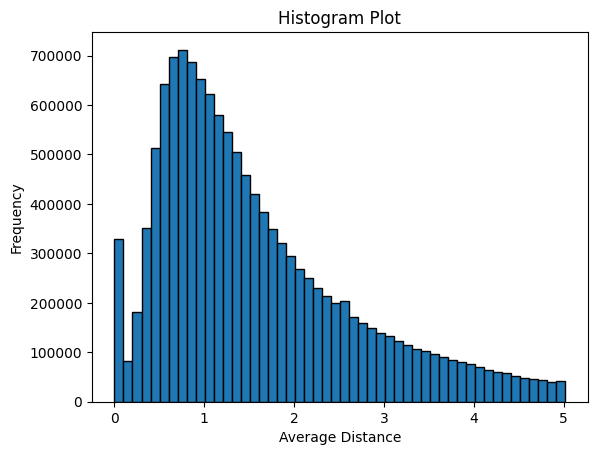

In [57]:
import matplotlib.pyplot as plt

num_bins = 50  
plt.hist(avg_dist, bins=num_bins, edgecolor='k', range=(0.0, 5.02))
plt.xlabel('Average Distance')
plt.ylabel('Frequency')
plt.title('Histogram Plot')
plt.show()

In [61]:
distinct_values = defaultdict(set)

with open('trip_data_9.csv', 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    c= 0
    for row in csv_reader:
        c+=1
        if c<1000:
            for key, value in row.items():
                distinct_values[key].add(value)
        else:
            break

# Print distinct values for each field
for field, values in distinct_values.items():
    print(f"{field}: {', '.join(values)}")

medallion: 0053334C798EC6C8E637657962030F99, 860F8EAF5F958ABDFE13BE8437C181C8, 3540A507DFBCCDAEED99E7559B8F41FC, 6B129E331EDE126B4E9AE336E45F0643, 20479D164B3998B52930268E58354312, 9E0FF4A265C054381E44CC424E964D3E, AAF7BAA49A7C63124C4C679662893891, 991D0F2BFE8C0E7EFAD3440E7D5E75AF, C7C670B61035071B3611BFE9704B5AFB, F31C1DCC59DED4B0FF97FFF34F39FFE4, FEDAC70512BB43174F602667A6CF0219, F8702593C564A7AB232F793DAC9AA668, 38A7CAA4DAC9F9BA44AF2621988B1D27, C2D5A84F0C0E54AFC1723E124D2115F1, F4C689447C42C76B4DE15780BF6126C4, F47CB8CC67713530FDF49EA5018E765F, A7C76FF488E0BCCABEABC173FB8FB5DB, 789B8DC7F3CB06A645B0CDC24591B832, 8D862648A42EEF08D29AD669EFB562E7, 149298F6D390FA640E80B41ED31199C5, DE4952D04246E55D7660B1A262F77DE7, 93EC0E01A8D4F29F4BD85319F94A65DB, 515EB6F8BEDB2B17CF1CF3B27B76AA93, 14A45A1EAE619E175194F14EA4E65AC2, 47D0E2037D5732B2D397B7F4D1A09ACD, 6EAF54E36DE57B708CE39CCDC3B408B8, D3D055476B49E90E47BD255A23AFAFBE, D7B7F872E15B08447C190C886333CB70, E1E0B45B68431E11079E0F33ADEB6C1B, F77

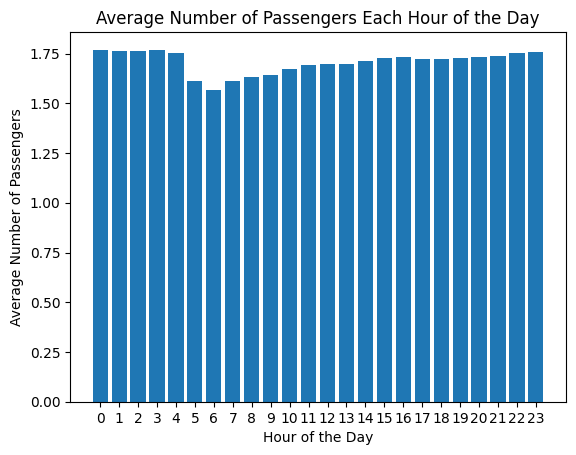

FileNotFoundError: [Errno 2] No such file or directory: 'trip_data_9.csv.csv'

In [63]:
numeric_fields = [' passenger_count', ' trip_time_in_secs', ' trip_distance']
min_max_values = {}

for field in numeric_fields:
    values = [float(row[field]) for row in csv.DictReader(open('trip_data_9.csv', 'r'))]
    min_max_values[field] = {'min': min(values), 'max': max(values)}

# Print min and max values for numeric fields
for field, values in min_max_values.items():
    print(f"{field}: Min - {values['min']}, Max - {values['max']}")

 passenger_count: Min - 0.0, Max - 208.0
 trip_time_in_secs: Min - 0.0, Max - 10680.0
 trip_distance: Min - 0.0, Max - 100.0


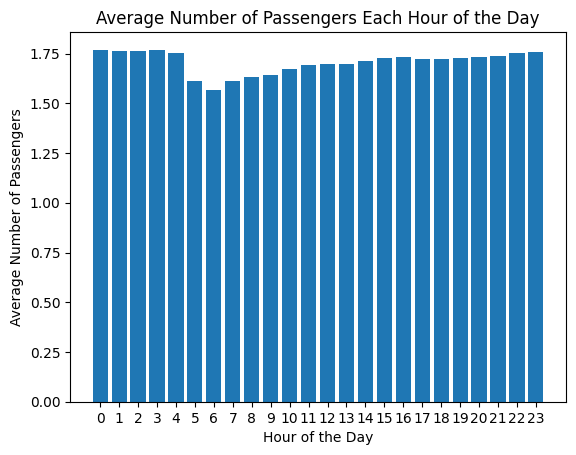

In [68]:
passengers_per_hour = defaultdict(list)

with open('trip_data_9.csv', 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    
    for row in csv_reader:
        pickup_hour = int(row[' pickup_datetime'].split()[1].split(':')[0])
        passengers_per_hour[pickup_hour].append(int(row[' passenger_count']))

average_passengers_per_hour = {hour: sum(passengers) / len(passengers) for hour, passengers in passengers_per_hour.items()}

# Create chart
plt.bar(average_passengers_per_hour.keys(), average_passengers_per_hour.values())
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Passengers')
plt.title('Average Number of Passengers Each Hour of the Day')
plt.xticks(range(24))
plt.show()

In [69]:
with open('trip_data_9.csv', 'r') as input_file, open('reduced_data.csv', 'w', newline='') as output_file:
    csv_reader = csv.reader(input_file)
    csv_writer = csv.writer(output_file)
    
    for i, row in enumerate(csv_reader):
        if i % 1000 == 0:
            csv_writer.writerow(row)

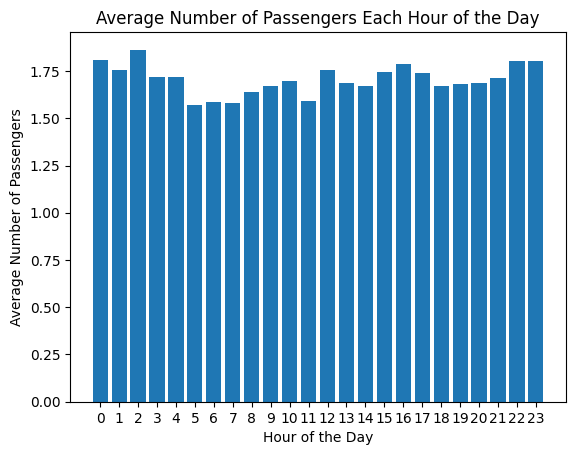

In [70]:
passengers_per_hour = defaultdict(list)

with open('reduced_data.csv', 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    
    for row in csv_reader:
        pickup_hour = int(row[' pickup_datetime'].split()[1].split(':')[0])
        passengers_per_hour[pickup_hour].append(int(row[' passenger_count']))

average_passengers_per_hour = {hour: sum(passengers) / len(passengers) for hour, passengers in passengers_per_hour.items()}

# Create chart
plt.bar(average_passengers_per_hour.keys(), average_passengers_per_hour.values())
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Passengers')
plt.title('Average Number of Passengers Each Hour of the Day')
plt.xticks(range(24))
plt.show()